In [1]:
## Welcome to
#Final Project
#Sales Data Analysis and Reporting for a Retail chain

In [2]:
###Project Plan
#The aim of this project is to use Python, SQL, and Excel to analyze sales
#data and generate meaningful reports for a retail chain.

In [3]:
###Phase 2: Data Cleaning and Preparation
#1. Data Cleaning: Use SQL queries and Python (pandas) to clean the
#data. Look for and handle missing or inconsistent data, outliers, etc.
#2. Data Preparation: Prepare the data for analysis. This may involve
#creating additional calculated fields, such as total sales value,
#month/year fields for time-based analysis, etc. Again, this can be done
#using a combination of SQL and Python.

In [4]:
import pandas as pd

In [5]:
tran= pd.read_csv('Retail_Data_Transactions.csv')
tran

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [6]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [7]:
df= tran.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [8]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [9]:
df.shape

(125000, 4)

In [10]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [11]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [12]:
# missing values

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [13]:
df= df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [14]:
# change dtypes

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24356\415373954.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24356\415373954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24356\415373954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [15]:
set(df['response'])

{0, 1}

In [16]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [17]:
#check for outliers

#z-scores

from scipy import stats
import numpy as np


#cal z-score

z_scores= np.abs(stats.zscore(df['tran_amount']))

#cal a threshold

threshold= 3

outliers= z_scores>threshold

print(df[outliers])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [18]:
#check for outliers

#z-scores

from scipy import stats
import numpy as np


#cal z-score

z_scores= np.abs(stats.zscore(df['response']))

#cal a threshold

threshold= 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


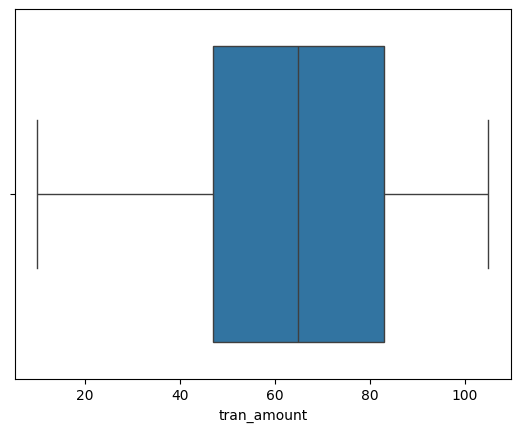

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [20]:
## creating a new columns

df['month']= df['trans_date'].dt.month

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24356\2787821212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


In [21]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [22]:
## which three months have had the highest tran amount?

monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head()
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795


In [23]:
## customers having highest num of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id', 'count']
customer_counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3805,35
4,CS1215,35
...,...,...
6879,CS7333,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [24]:
##sort 
top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
4,CS1215,35
3,CS3805,35


<Axes: xlabel='customer_id', ylabel='count'>

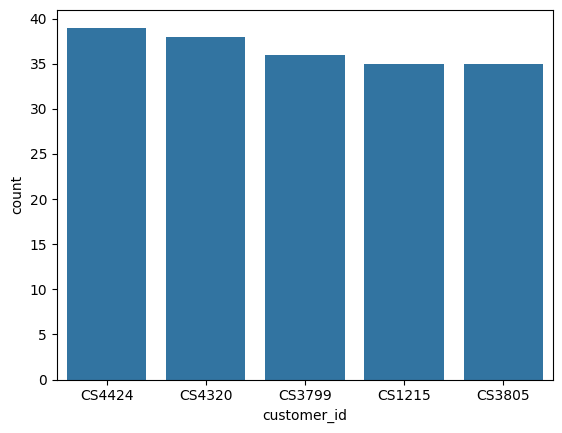

In [25]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [26]:
## customers having highest num of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

 
top_5_cus= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_cus

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

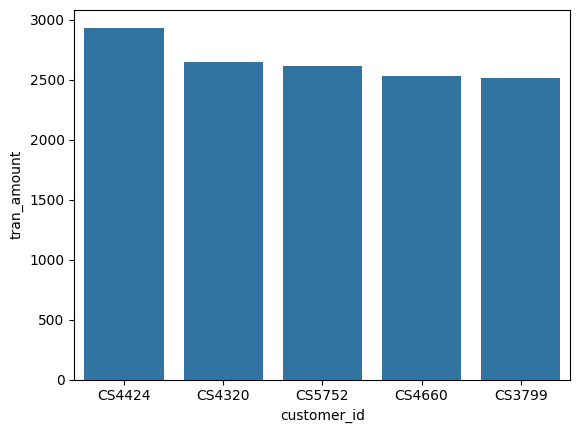

In [27]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_cus)

In [28]:
## Phase 3: Data Analysis
#. Data Exploration: Use SQL queries and Python (pandas, matplotlib,seaborn, etc) to explore the data and identify trends and patterns.
#. Advanced Analysis: Perform more complex analysis as needed. For
#example, time series analysis for sales trends, cohort analysis for
#customer behavior, etc. Python's advanced data analysis libraries canbe very useful here.

In [29]:
###ADVANCED ANLYTICS

In [30]:
###TIME SERIES ANALYSIS

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24356\3473603825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


AttributeError: module 'matplotlib.dates' has no attribute 'DataFormatter'

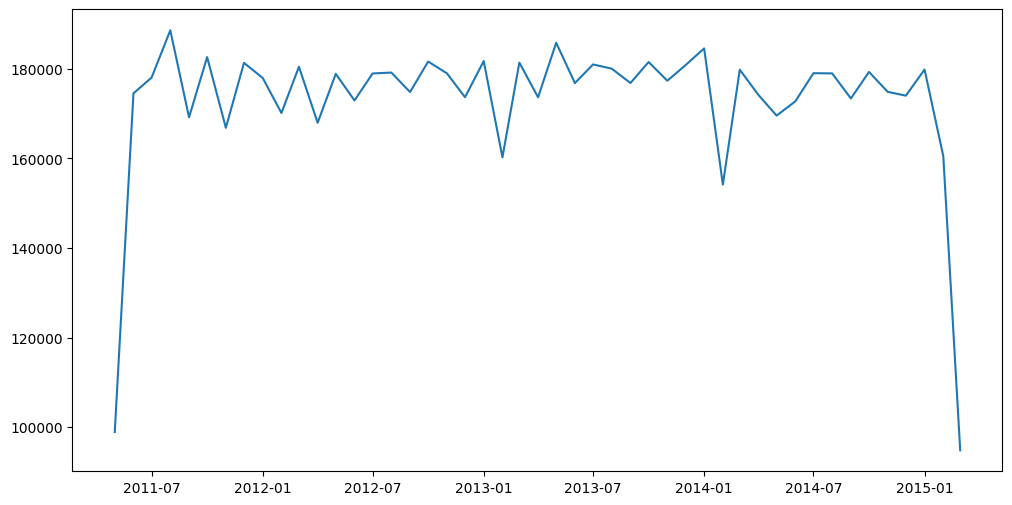

In [31]:
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('M')
monthly_sales= df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DataFormatter('%Y-%M'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.yalbel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df

In [ ]:
#COHORT SEGMENTATION

In [32]:
# Recency
recency= df.groupby('customer_id')['trans_date'].max()

#FREQUENCY

frequency= df.groupby('customer_id')['trans_date'].count()

# Monetary

monetary= df.groupby('customer_id')['tran_amount'].sum()


rfm= pd.DataFrame({'recency':recency, 'frequency':frequency,'monetary':monetary})

In [33]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [ ]:
### customer segmenatation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:

        return 'P0'

    elif(2011<=row['recency'].year<2012) and row['frequency']>=15 and (500<=row['monetary']<=1000):

        return 'P1'
    else:
        return 'P2'


rfm['Segment']= rfm.apply(segment_customer, axis=1)

In [34]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


<Axes: xlabel='response'>

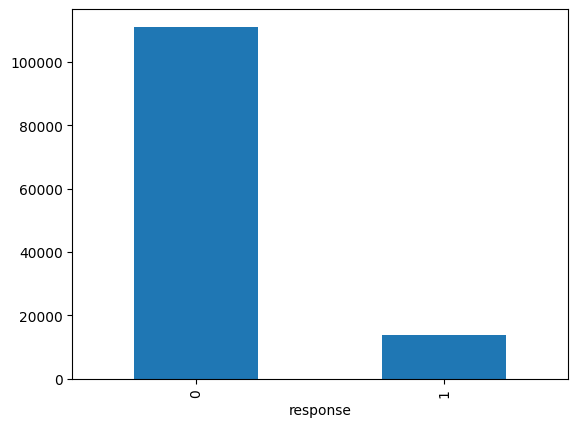

In [35]:
### CHURN ANALYSIS
## Count the number of churned and active customers
churn_counts= df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')

In [ ]:
###ANALYSIS TOP CUSTOMERS

<Axes: xlabel='month_year'>

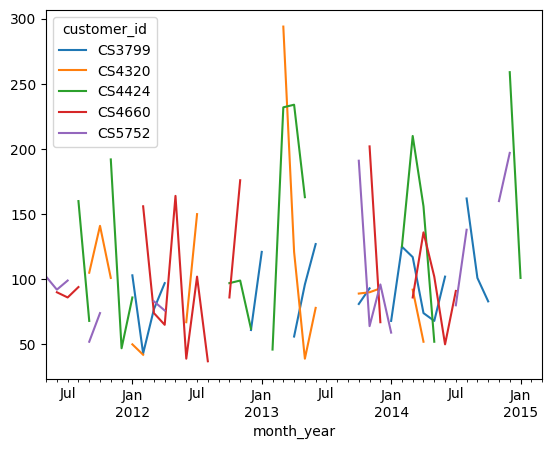

In [36]:
top_5_cus= monetary.sort_values(ascending=False).head(5).index

top_customers_df= df[df['customer_id'].isin(top_5_cus)]

top_customer_sales= top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')


In [41]:
df.to_csv('Retail_Data_Transactions.csv')

In [42]:
rfm.to_csv('Retail_Data_Response.csv')